In [ ]:
# Carlos Espinoza
# Enhancing the operational resilience of Cyber-manufacturing Systems (CMS) against cyber-attacks
# Code 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
from scipy import stats
from sklearn.linear_model import LinearRegression

In [ ]:
# Define Variables
clock = 0 # Timestamp measured in mins
days = 30 # number of working days of the simulation
working_minutes = 480 # number of minutes per day
runtime = days*working_minutes # runtime of simulation

In [ ]:
# Production Variables

clock = 0 # Timestamp measured in mins
days = 30 # number of working days of the simulation
working_minutes = 480 # number of minutes per day
runtime = days*working_minutes # runtime of simulation
o = [np.random.randint(30, 60) for d in range(days)] # number of total orders per day
daily_processing_time = [] # processing time of each order
do = [o[n]+mo[n] for n in range(days)] #daily orders
to = sum(do) # total orders for production cycle
quality_rate = 0.9 # % of orders printed correctly



# Attacks characteristics
mo = [0 if np.random.rand() < 0.90 else 1 for d in range(days)] # number malicious orders per day
attack2 = [np.random.randint(20, working_minutes), np.random.randint(1, days)*working_minutes] # time and day of advent of attack 2
A2 = [50, 100, 0.5] # Effects of attack 2, TTD = 50 min, TTR = 100 min, QR = 0.5
attack3 = [np.random.randint(20, working_minutes), np.random.randint(1, days)*working_minutes] # time and day of advent of attack 3
A3 = [200, 480, 0.4] # Effects of attack 3, TTD = 200 min, TTR = 480 min, QR = 0.4

# Resilience mechanisms

R2 = [50, 0.8, 5] # Resilience mechanism characteristics TTR = 50, QR = 0.8, cost = 5
R2 = [150, 0.7, 10] # Resilience mechanism characteristics TTR = 150, QR = 0.7, cost = 10

daily_processing_time = [] # processing time of each order
do = [o[n]+mo[n] for n in range(days)] #daily orders
to = sum(do) # total orders for production cycle
quality_rate = 0.9 # % of orders printed correctly

# Metrics

S = [] # Time that server actually spends serving ith order
I = [] # Idle time of the server, combination of warm up period and downtime
U = [] # Daily production utilization 
D = [] # Daily downtime
P = [] # Production output
W = [] # Scrap orders
F = [] # Fill rate 
WR = [] # Scrap rate

# Generate production data at each time stamp
day = 0
warm_up = 20 # time it takes for the printer to warm up

while clock < runtime: # timer of production

  # Start each day
  if clock in [s for s in range(0, runtime, working_minutes)]:

    # Processing time per each order mean =8, sd = 2
    time = warm_up # warm up time at the beginning of each working day
    output = 0
    scrap = 0

    # Generate processing time per order
    for order in range(do[day]): 
      daily_processing_time.append(np.random.normal(8, 2))

    # Advent of attack

    if clock == attack3[1]:
      print("Attack 3 occurred on day " + str(int(attack3[1]/480)) + ' at: ' + str(attack3[0]) + ' mins')
      for order in range(do[day]):
        if time + daily_processing_time[order] >= working_minutes: 
          break
        time = time + daily_processing_time[order]
        if time > attack3[0]:
          quality_rate = A3[2]
        if time < A3[0] + A3[1]:
          quality_rate = 0.9
        
        #Quality output

        if np.random.rand() < quality_rate: 
          output = output + 1  
          
        else:

          scrap = scrap + 1

          # Reprocess bad order 
          if time + daily_processing_time[order] <= working_minutes:
            
            time = time + daily_processing_time[order]
            output = output + 1
        
    else:
      # Check remaining time
      for order in range(do[day]):
        if time + daily_processing_time[order] >= working_minutes: 
          break
        time = time + daily_processing_time[order]
        
        #Quality output

        if np.random.rand() < quality_rate: 
          output = output + 1  
          
        else:

          scrap = scrap + 1

          # Reprocess bad order 
          if time + daily_processing_time[order] <= working_minutes:
            
            time = time + daily_processing_time[order]
            output = output + 1

    # malicious orders
    scrap = scrap + mo[day]
    output = output - mo[day]  
 
    # Calculating daily KPIs

    S.append(time) # Daily uptime
    I.append(working_minutes - time)  # Daily idle time
    U.append(time / working_minutes) # Daily utilization
    D.append(1-(time / working_minutes)) # Daily downtime
    F.append(output / o[day]) # Fill rate
    P.append(output) # Production output
    W.append(scrap) # Scrap orders
    WR.append(scrap/output) # Scrap rate

    # advance to next working day
    quality_rate = 0.9
    day = day + 1 
      
  clock = clock + 1 # add next timestamp
clock = 0


Attack 3 occurred on day 23 at: 102 mins


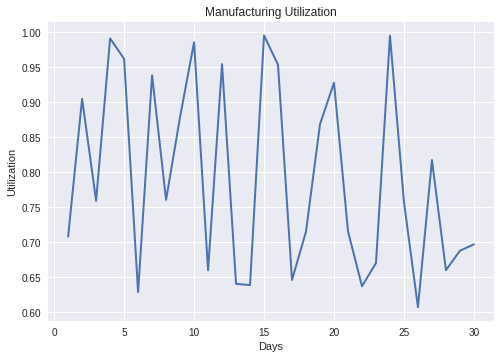

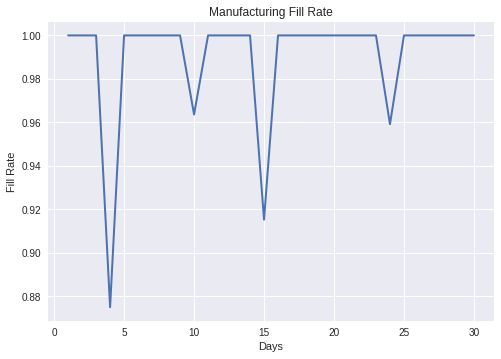

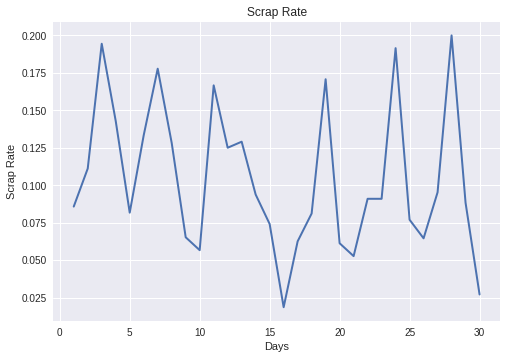

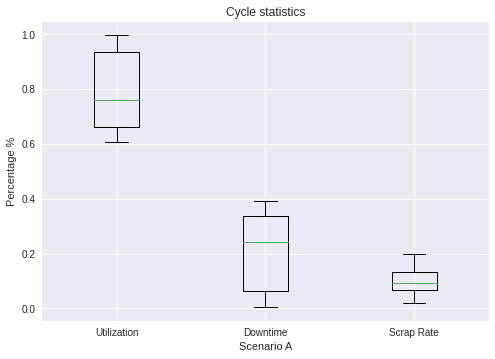

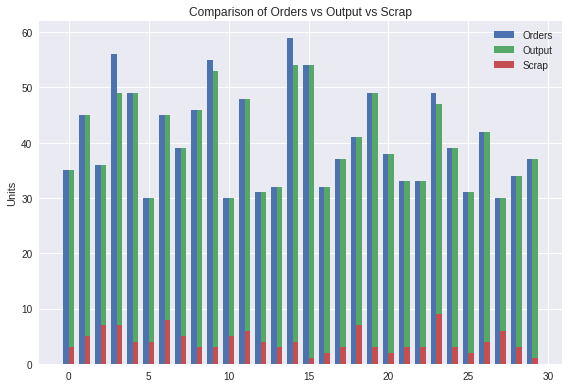

In [ ]:
# Plot manufacturing metrics

# Utilization
plt.style.use('seaborn')

fig, ax = plt.subplots()
ax.plot([n+1 for n in range(days)], U, linewidth=2.0)
plt.title("Manufacturing Utilization")
plt.xlabel("Days")
plt.ylabel("Utilization")
plt.show()

# Fill Rate
fig, ax = plt.subplots()
ax.plot([n+1 for n in range(days)], F, linewidth=2.0)
plt.title("Manufacturing Fill Rate")
plt.xlabel("Days")
plt.ylabel("Fill Rate")
plt.show()

# Scrap Rate
fig, ax = plt.subplots()
ax.plot([n+1 for n in range(days)], WR, linewidth=2.0)
plt.title("Scrap Rate")
plt.xlabel("Days")
plt.ylabel("Scrap Rate")
plt.show()

# Cycle Utilization Statistics 

data = list([U, D, WR])
fig, ax = plt.subplots()

# build a box plot
ax.boxplot(data)

# title and axis labels
ax.set_title('Cycle statistics')
ax.set_xlabel('Scenario A')
ax.set_ylabel('Percentage %')
xticklabels=['Utilization', 'Downtime', 'Scrap Rate']

ax.set_xticklabels(xticklabels)

# add horizontal grid lines
ax.yaxis.grid(True)


# show the plot
plt.show()

# Daily Orders vs Output vs Scrap

labels = [n+1 for n in range(days)]
orders = o
output = P
scrap = W

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, orders, width, label='Orders')
rects2 = ax.bar(x + width/2, output, width, label='Output')
rects3 = ax.bar(x + width/2, scrap, width, label='Scrap')

# Labels

ax.set_ylabel('Units')
ax.set_title('Comparison of Orders vs Output vs Scrap')
ax.legend()

fig.tight_layout()

plt.show()




Cycle KPIs are: Fill Rate: 0.9752305650820254, Utilization: 0.8407916913404344, and Scrap Rate: 0.09734680744086908


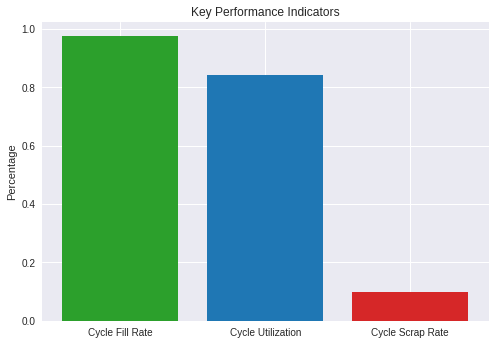

In [ ]:
# Cycle results

cycle_fill_rate = np.mean(F)
cycle_utilization = np.mean(U)
cycle_scrap_rate = np.mean(WR)

print("Cycle KPIs are: Fill Rate: " + str(cycle_fill_rate) + ", Utilization: " + str(cycle_utilization) + ", and Scrap Rate: " + str(cycle_scrap_rate))

# Plot results

fig, ax = plt.subplots()
rates = ['Cycle Fill Rate', 'Cycle Utilization', 'Cycle Scrap Rate']
counts = [cycle_fill_rate, cycle_utilization, cycle_scrap_rate]

bar_colors = ['tab:green', 'tab:blue', 'tab:red']

ax.bar(rates, counts, color=bar_colors)

ax.set_ylabel('Percentage')
ax.set_title('Key Performance Indicators')



plt.show()




In [ ]:
# Track resilience metrics

print(F)




[1.0, 0.9482758620689655, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9107142857142857, 1.0, 1.0, 1.0, 1.0, 0.896551724137931, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
# Generating Data
days = 2
o = np.random.randint(30, 60) # number of total orders per day

# Attacks characteristics
mo = 0 if np.random.rand() < 0.90 else 1 # number malicious orders per day
attack2 = [np.random.randint(20, working_minutes), np.random.randint(1, days)*working_minutes] # time and day of advent of attack 2
A2 = [50, 100, 0.5] # Effects of attack 2, TTD = 50 min, TTR = 100 min, QR = 0.5
attack3 = [np.random.randint(20, working_minutes), np.random.randint(1, days)*working_minutes] # time and day of advent of attack 3
A3 = [100, 120, 0.2] # Effects of attack 3, TTD = 200 min, TTR = 480 min, QR = 0.2

# Resilience mechanisms

R2 = [50, 0.8, 5] # Resilience mechanism characteristics TTR = 50, QR = 0.8, cost = 5
R2 = [150, 0.7, 10] # Resilience mechanism characteristics TTR = 150, QR = 0.7, cost = 10


quality_rate = 0.9 # % of orders printed correctly

# Metrics

S = [] # Time that server actually spends serving ith order
I = [] # Idle time of the server, combination of warm up period and downtime
U = [] # Daily production utilization 

D = [] # Daily downtime
P = [] # Production output
W = [] # Scrap orders
F = [] # Fill rate 
WR = [] # Scrap rate
Results = [] # Save results with attack advent timestamp

# Generate production data at each time stamp
day = 0
warm_up = 20 # time it takes for the printer to warm up

for o in range(35, 50):

  daily_processing_time = [np.random.normal(8, 2) for x in range(o)] # Processing time per order 

  # Attack happens at every working minute

  for minute in range(20, 480):
    
    time = warm_up # warm up time at the beginning of each working day
    output = 0
    scrap = 0

    for order in range(o):

        if time + daily_processing_time[order] >= working_minutes: 
          break

        time = time + daily_processing_time[order]

        if time > minute:
          quality_rate = A3[2]
        if time > minute + A3[0] + A3[1]:
          quality_rate = 0.9
        
        #Quality output

        if np.random.rand() < quality_rate: 
          output = output + 1  
          
        else:

          scrap = scrap + 1

          # Reprocess bad order 
          if time + daily_processing_time[order] <= working_minutes:
            
            time = time + daily_processing_time[order]
            output = output + 1
        
        # malicious orders
    scrap = scrap + mo
    output = output - mo
 
    # Calculating daily KPIs

    S.append(time) # Daily uptime
    I.append(working_minutes - time)  # Daily idle time
    U.append(time / working_minutes) # Daily utilization
    D.append(1-(time / working_minutes)) # Daily downtime
    F.append(output / o) # Fill rate
    P.append(output) # Production output
    W.append(scrap) # Scrap orders
    WR.append(scrap/output) # Scrap rate
    resilience = 1 if output / o > 0.9 else 0
    Results.append([minute, time / working_minutes, 1-(time / working_minutes), output / o, o, output, scrap / output, resilience])

    # advance to next working day
    quality_rate = 0.9

df = pd.DataFrame(Results, columns=['minute', 'Utilization', 'Downtime', 'Fill Rate', 'Orders', 'Output', 'Scrap Rate', 'Resilience'])

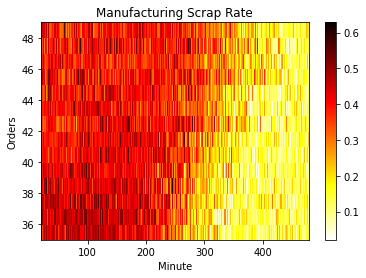

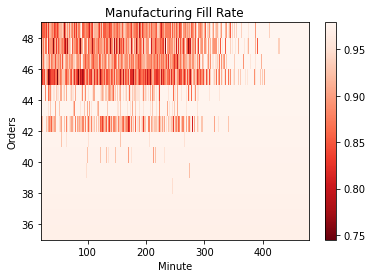

In [ ]:
from scipy.interpolate import griddata


# use your x,y and z arrays here
xf = df['minute']
yf = df['Orders']
zf = df['Scrap Rate'].to_numpy()

x=np.unique(xf)
y=np.unique(yf)
X,Y = np.meshgrid(x,y)

Z=zf.reshape(len(y),len(x))

heatmap = plt.pcolormesh(X,Y,Z, cmap ='hot_r', label='Fill Rate')
plt.title("Manufacturing Scrap Rate")
plt.xlabel('Minute')
plt.ylabel("Orders")

cbar = plt.colorbar(heatmap)
plt.show()

# use your x,y and z arrays here
xf = df['minute']
yf = df['Orders']
zf = df['Fill Rate'].to_numpy()

x=np.unique(xf)
y=np.unique(yf)
X,Y = np.meshgrid(x,y)

Z=zf.reshape(len(y),len(x))

heatmap = plt.pcolormesh(X,Y,Z, cmap ='Reds_r', label='Fill Rate')
plt.title("Manufacturing Fill Rate")
plt.xlabel('Minute')
plt.ylabel("Orders")

cbar = plt.colorbar(heatmap)
plt.show()



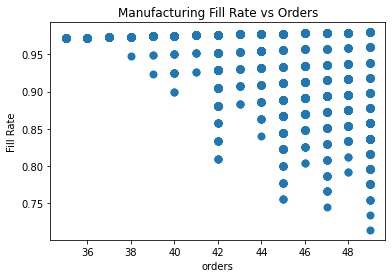

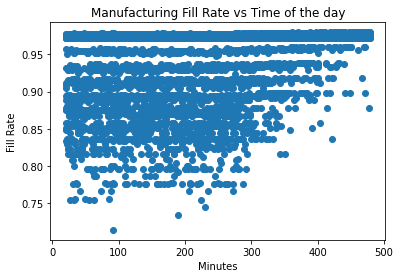

In [ ]:
from scipy.interpolate import griddata


# use your x,y and z arrays here
x = df['minute']
y = df['Orders']
z = df['Fill Rate']

# Fill Rate vs Orders
fig, ax = plt.subplots()
plt.scatter(y, F, linewidth=2.0)
plt.title("Manufacturing Fill Rate vs Orders")
plt.xlabel("orders")
plt.ylabel("Fill Rate")
plt.show()

# Fill Rate vs Time of the day
fig, ax = plt.subplots()
plt.scatter(x, F)
plt.title("Manufacturing Fill Rate vs Time of the day")
plt.xlabel("Minutes")
plt.ylabel("Fill Rate")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

x = df[['minute', 'Orders']]
y = df['Fill Rate']

import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")



coefficient of determination: 0.4343882174848731
intercept: 1.181873928903552
slope: [ 0.00011604 -0.00625326]


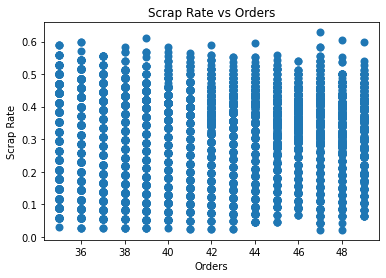

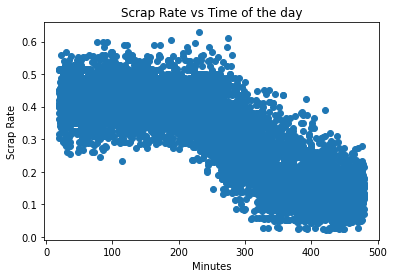

In [ ]:
from scipy.interpolate import griddata


# use your x,y and z arrays here
x = df['minute']
y = df['Orders']
z = df['Scrap Rate']

# Fill Rate vs Orders
fig, ax = plt.subplots()
plt.scatter(y, z, linewidth=2.0)
plt.title("Scrap Rate vs Orders")
plt.xlabel("Orders")
plt.ylabel("Scrap Rate")
plt.show()

# Fill Rate vs Time of the day
fig, ax = plt.subplots()
plt.scatter(x, z)
plt.title("Scrap Rate vs Time of the day")
plt.xlabel("Minutes")
plt.ylabel("Scrap Rate")
plt.show()

coefficient of determination: 0.6541008469786032
intercept: 0.4474721986290714
slope: [-0.00080289  0.00146502]
1


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


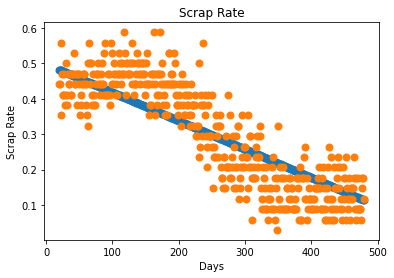

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

x = df[['minute', 'Orders']]
y = df['Scrap Rate']

import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

#Predict

y_1 = model.predict(x.iloc[:460])
y_1[y_1 > 1] = 1

print('1' if model.predict(np.array([20, 35]).reshape(1, -1)) > 0.2 else '2')


# Plot predictions

# Fill Rate
fig, ax = plt.subplots()
ax.scatter([20+n for n in range(460)], y_1, linewidth=2.0)

ax.scatter([20+n for n in range(460)], y.iloc[:460],linewidth=2.0)
plt.title("Scrap Rate")
plt.xlabel("Days")
plt.ylabel("Scrap Rate")
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y.iloc[:460], y_1))


Mean squared error: 0.01


In [ ]:
# Generating Data
days = 2
o = np.random.randint(30, 60) # number of total orders per day

# Attacks characteristics
mo = 0 if np.random.rand() < 0.90 else 1 # number malicious orders per day
attack2 = [np.random.randint(20, working_minutes), np.random.randint(1, days)*working_minutes] # time and day of advent of attack 2
A2 = [50, 100, 0.5] # Effects of attack 2, TTD = 50 min, TTR = 100 min, QR = 0.5
attack3 = [np.random.randint(20, working_minutes), np.random.randint(1, days)*working_minutes] # time and day of advent of attack 3
A3 = [100, 120, 0.6] # Effects of attack 3, TTD = 200 min, TTR = 480 min, QR = 0.2

# Resilience mechanisms

R2 = [50, 1, 5] # Resilience mechanism characteristics TTR = 50, QR = 0.8, cost = 5



quality_rate = 0.9 # % of orders printed correctly

# Metrics

S = [] # Time that server actually spends serving ith order
I = [] # Idle time of the server, combination of warm up period and downtime
U = [] # Daily production utilization 

D = [] # Daily downtime
P = [] # Production output
W = [] # Scrap orders
F = [] # Fill rate 
WR = [] # Scrap rate
Results = [] # Save results with attack advent timestamp

# Generate production data at each time stamp
day = 0
warm_up = 20 # time it takes for the printer to warm up

daily_processing_time = [np.random.normal(8, 2) for x in range(o)] # Processing time per order 

# Track resilience decision

decision = [] # Track resilience decision
threshold = 0.2

for repetition in range(100):

  o = np.random.randint(35, 50) # number of total orders per day
  daily_processing_time = [np.random.normal(8, 2) for x in range(o)] # Processing time per order
  advent = np.random.randint(20, working_minutes) # advent of attack
  prediction = model.predict(np.array([advent, o]).reshape(1, -1))
  time = warm_up
  scrap = 0
  output = 0

  for order in range(o):

    if time + daily_processing_time[order] >= working_minutes: 
      break

    time = time + daily_processing_time[order]

    if time > advent:

      # decide on resilience
      if prediction > threshold:
        activation = 1
        quality_rate = R2[1] #Attach resilience rate

      else:
        activation = 0
        quality_rate = A3[2]  # Attack quality rate prevails
    
    #if time > advent + A3[0] + A3[1]:
     # quality_rate = 0.9
    
    #Quality output

    if np.random.rand() < quality_rate: 
      output = output + 1  
      
    else:
      scrap = scrap + 1
      # Reprocess bad order 
      if time + daily_processing_time[order] <= working_minutes:
        
        time = time + daily_processing_time[order]
        output = output + 1
    
  # Calculating daily KPIs

  S.append(time) # Daily uptime
  I.append(working_minutes - time)  # Daily idle time
  U.append(time / working_minutes) # Daily utilization
  D.append(1-(time / working_minutes)) # Daily downtime
  F.append(output / o) # Fill rate
  P.append(output) # Production output
  W.append(scrap) # Scrap orders
  WR.append(scrap/output) # Scrap rate
  resilience = 1 if output / o > 0.9 else 0
  decision.append(activation) 
  Results.append([minute, time / working_minutes, 1-(time / working_minutes), output / o, o, output, scrap / output, resilience, activation, scrap, prediction])

  # advance to next working day
  quality_rate = 0.9

df = pd.DataFrame(Results, columns=['minute', 'Utilization', 'Downtime', 'Fill Rate', 'Orders', 'Output', 'Scrap Rate', 'Resilience', 'Decision', 'scrap', 'Prediction'])

NameError: ignored

94
0     [0.20721509205340372]
1     [0.16881707922999822]
2       [0.304307512402066]
3      [0.3675117952678139]
4     [0.18704372985432105]
              ...          
95      [0.351537327660506]
96    [0.14284304017822547]
97     [0.3833714500016866]
98     [0.4278693914907038]
99     [0.1781702499183636]
Name: Prediction, Length: 100, dtype: object
2.36


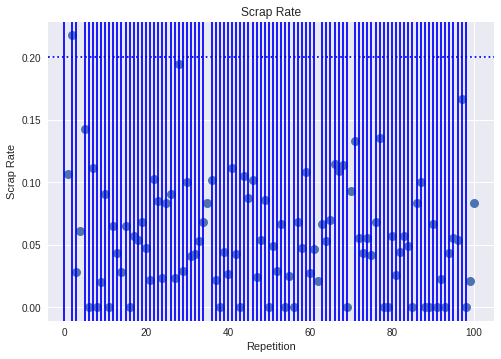

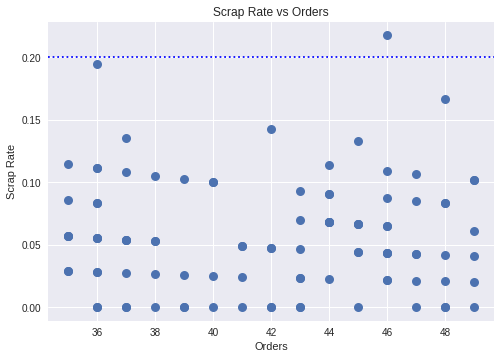

In [ ]:
plt.style.use('seaborn')

print(df['Decision'].sum())
print(df['Prediction'])
print(df['scrap'].mean())
fig, ax = plt.subplots()
ax.scatter([n+1 for n in range(100)], df['Scrap Rate'], linewidth=2.0)
# only one line may be specified; full height

# mark resilience activation

for flag in range(100):
  if df['Decision'][flag] == 1:
    plt.axvline(x = flag, color = 'b', label = 'axvline - full height')

plt.axhline(y = threshold, color = 'b', linestyle = ':', label = "Threshold")
plt.title("Scrap Rate")
plt.xlabel("Repetition")
plt.ylabel("Scrap Rate")
plt.show()

# Fill Rate vs Orders
fig, ax = plt.subplots()
plt.scatter(df['Orders'], df['Scrap Rate'], linewidth=2.0)
plt.axhline(y = threshold, color = 'b', linestyle = ':', label = "Threshold")
plt.title("Scrap Rate vs Orders")
plt.xlabel("Orders")
plt.ylabel("Scrap Rate")
plt.show()


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

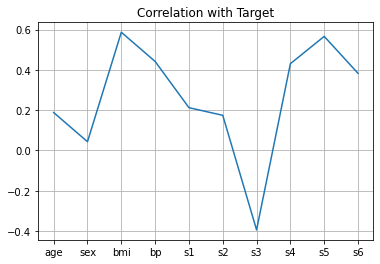

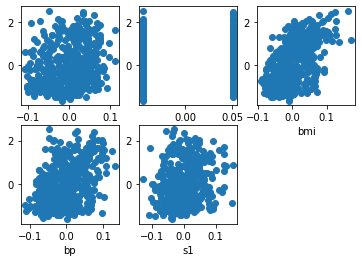

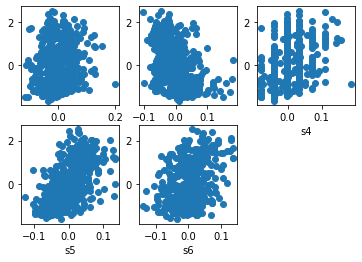

H = 100, lr = 0.0001: Training RMSE = 54.01300486695841, Testing RMSE = 55.86360502759213
H = 100, lr = 0.001: Training RMSE = 42.10342386677179, Testing RMSE = 64.05218788701701
H = 200, lr = 0.0001: Training RMSE = 52.63605406198923, Testing RMSE = 55.18925513692793
H = 200, lr = 0.001: Training RMSE = 32.25867684577954, Testing RMSE = 66.68612544251914


In [ ]:
# Neural Network
# Carlos Espinoza

import numpy as np
from matplotlib import pyplot as plt
import torch
from sklearn.model_selection import KFold
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

Labels = diabetes.feature_names
data = diabetes.data
target = diabetes.target
target = target.reshape(-1, 1)
# define standard scaler
scaler = StandardScaler()
# transform data
target = scaler.fit_transform(target)

# Scale scklearn.standardscalar
Correlation = [np.corrcoef(data[:, index], target[:, 0])[1, 0] for index in range(len(Labels))]

Correlation_figure = plt.figure
plt.plot(Labels, Correlation)
plt.title('Correlation with Target')
plt.grid()
plt.show()

# Plots

fig1 = plt.figure()
plt.title('Correlation with Target')
for index in range(5):
    plt.subplot(2, 3, index + 1)
    plt.plot(data[:, index], target, 'o')
    plt.xlabel(Labels[index])

plt.show()

fig2 = plt.figure()
plt.title('Correlation with Target')
for index in range(5, 10):
    plt.subplot(2, 3, index - 4)
    plt.plot(data[:, index], target, 'o')
    plt.xlabel(Labels[index])

plt.show()

# Feature Selection - Delete sex because of low correlation

data = np.delete(data, 1, 1)


# Def Functions

class ThreeLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super().__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, H)
        self.linear3 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        h1 = self.linear1(x).clamp(min=0)
        h2 = self.linear2(h1).clamp(min=0)
        return self.linear3(h2)
        # return self.linear2(self.linear1(x).clamp(min=0))


# Training function
def train(X_train, Y_train, H, learning_rate, epochs=1000):
    model = ThreeLayerNet(X_train.shape[1], H, Y_train.shape[1])
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        inputs = torch.from_numpy(X_train).float()
        labels = torch.from_numpy(Y_train).float()

        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()

    return model


# RMSE loss
def rmse(yhat, y):
    return np.sqrt(np.mean((yhat - y) ** 2))


# MAPE

def mape(yhat, y):
    return np.mean(np.abs((y - yhat) / y))


# K-Fold cross validation
def kfold_CV(data, target, K, H, learning_rate):
    global Y_test
    kf = KFold(n_splits=K, shuffle=True)
    rmse_trn, rmse_tst = np.empty(0), np.empty(0)
    mape_trn, mape_tst = np.empty(0), np.empty(0)

    for trn_idx, tst_idx in kf.split(data):
        X_train, X_test = data[trn_idx, :], data[tst_idx, :]
        Y_train, Y_test = target[trn_idx, :], target[tst_idx, :]

        mdl = train(X_train=X_train, Y_train=Y_train, H=H, learning_rate=learning_rate)
        with torch.no_grad():
            yhat_trn = scaler.inverse_transform(mdl(torch.from_numpy(X_train).float()).numpy())
            yhat_tst = scaler.inverse_transform(mdl(torch.from_numpy(X_test).float()).numpy())

        Y_train = scaler.inverse_transform(Y_train)
        Y_test = scaler.inverse_transform(Y_test)

        rmse_trn = np.append(rmse_trn, rmse(yhat_trn, Y_train))
        rmse_tst = np.append(rmse_tst, rmse(yhat_tst, Y_test))
        mape_trn = np.append(mape_trn, mape(yhat_trn, Y_train))
        mape_tst = np.append(mape_tst, mape(yhat_tst, Y_test))

    # fig3 = plt.figure()
    # plt.title('Accuracy')
    # plt.plot(Y_test, 'o')
    # plt.plot(yhat_tst)
    # plt.show()

    return rmse_trn.mean(), rmse_tst.mean(), mape_trn.mean(), mape_tst.mean()


kfold_CV(data, target, 5, 200, 0.0001)

# Hyper parameter tunning

H_list = [100, 200]
lr_list = [0.0001, 0.001]

rmse_trn = np.zeros((len(H_list), len(lr_list)))
rmse_tst = np.zeros_like(rmse_trn)

for h, H in enumerate(H_list):
    for l, lr in enumerate(lr_list):
        trn_val, tst_val, _, _ = kfold_CV(data, target, 5, H, lr)
        rmse_trn[h, l] = trn_val
        rmse_tst[h, l] = tst_val

        print('H = {}, lr = {}: Training RMSE = {}, Testing RMSE = {}'.format(
            H, lr, trn_val, tst_val,
        ))

i, j = np.argwhere(rmse_tst == np.min(rmse_tst))[0]
h_best = H_list[i]
lr_best = lr_list[j]
